In [1]:
import tensorflow as tf

# import MNIST 
from tensorflow.examples.tutorials.mnist import input_data

# save the MNIST data in to the folder /mnist/datat/
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [2]:
%pylab       # to plot images import the necessary libraries        

# use matplotlib as inline
%matplotlib inline 

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


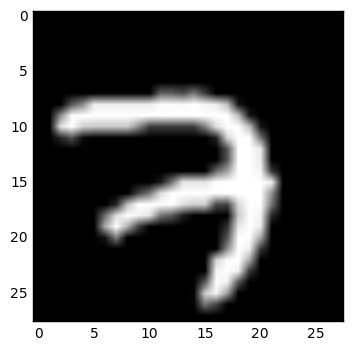

In [3]:
# print the label for the first training data in mnist
print(mnist.train.labels[0])
# See the first training image looks like
plt.imshow(np.reshape(mnist.train.images[0], (28, 28)), cmap='gray')

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


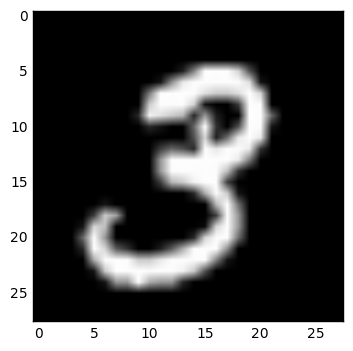

In [5]:
plt.figure()
print(mnist.train.labels[1])
# okay and what does the input look like
plt.imshow(np.reshape(mnist.train.images[1], (28, 28)), cmap='gray')

In [ ]:
#########
# Constituting the structure for the neural network
######
# The placeholder for the input image is 4-dimensional. Otherwise we cannot perform convolution.

X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])

# if we use drop-out we have to give the probability for the dropping out
keep_prob = tf.placeholder(tf.float32)  

# W1 [3 3 1 32] -> [3 3]: Kernel size, 1: number of input channel, 32: number of filters = number of output channels
# L1 Conv shape=(?, 28, 28, 32)
#    Pool     ->(?, 14, 14, 32)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
# perform 2D convolution with stride of 1 
# padding='SAME' means the output has the same size
L1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
# Pooling with tf.nn.max_pool 
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
# L1 = tf.nn.dropout(L1, keep_prob)

# L2 Conv shape=(?, 14, 14, 64)
#    Pool     ->(?, 7, 7, 64)
# W2 : [3, 3, 32, 64] 
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
# L2 = tf.nn.dropout(L2, keep_prob)

# FC layer : input 7x7x64 -> output 256
W3 = tf.Variable(tf.random_normal([7 * 7 * 64, 256], stddev=0.01))

# Reshape to (?, 7, 7, 64) for fully connection.
L3 = tf.reshape(L2, [-1, 7 * 7 * 64])
L3 = tf.matmul(L3, W3)
L3 = tf.nn.relu(L3)
L3 = tf.nn.dropout(L3, keep_prob)

# Last layer which turns the input of size 256 into 10 class outputs
W4 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L3, W4)

In [1]:
# Using the AdamOptimizer

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#########
# Train the model
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # reshape the image for convolution.
        batch_xs = batch_xs.reshape(-1, 28, 28, 1)

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          keep_prob: 0.7})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('End of optimization!')

#########
# Result
######
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('Accuracy:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images.reshape(-1, 28, 28, 1),
                                   Y: mnist.test.labels,
                                   keep_prob: 1}))

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.336
Epoch: 0002 Avg. cost = 0.098
Epoch: 0003 Avg. cost = 0.073
Epoch: 0004 Avg. cost = 0.056
Epoch: 0005 Avg. cost = 0.045
Epoch: 0006 Avg. cost = 0.040
Epoch: 0007 Avg. cost = 0.033
Epoch: 0008 Avg. cost = 0.030
Epoch: 0009 Avg. cost = 0.028
Epoch: 0010 Avg. cost = 0.023
Epoch: 0011 Avg. cost = 0.022
Epoch: 0012 Avg. cost = 0.020
Epoch: 0013 Avg. cost = 0.017
Epoch: 0014 Avg. cost = 0.015
Epoch: 0015 Avg. cost = 0.015
최적화 완료!
정확도: 0.9901
